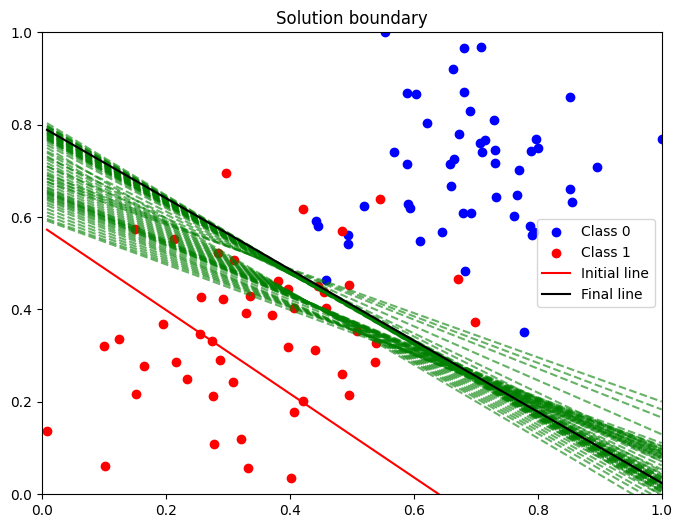

Learning rate:  0.01


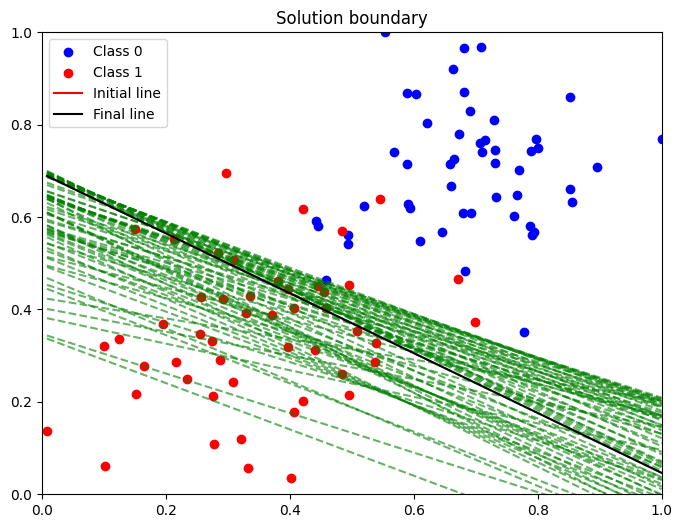

Learning rate:  0.1


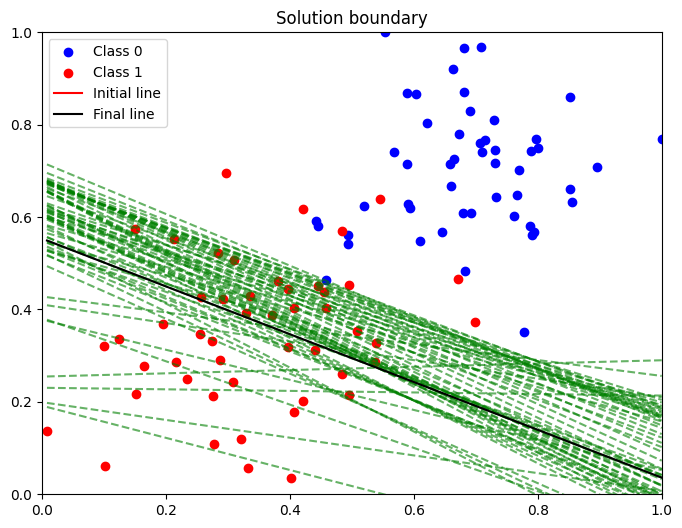

Learning rate:  1


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data ---------------------------------------------------------------
data = pd.read_csv("data.csv", header=None)
data.columns = ['x1', 'x2', 'label']

X = data[['x1', 'x2']].values
y = data['label'].values

# plot decision -----------------------------------------------------------
def plot(w, b, iteration, final=False):
	x_points = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
	y_vals = -(w[0] * x_points + b) / w[1]

	if iteration == 0:
		plt.plot(x_points, y_vals, 'r-', label='Initial line')
	elif final:
		plt.plot(x_points, y_vals, 'k-', label='Final line')
	else:
		plt.plot(x_points, y_vals, 'g--', alpha=0.6)

# perceptron --------------------------------------------------------------
def perceptron(X, y, r, iteration):
	w = np.random.uniform(-0.5, 0.5, size=2)
	b = np.random.uniform(-0.5, 0.5)

	plt.figure(figsize=(8, 6))
	for label, color in zip([0, 1], ['blue', 'red']):
		plt.scatter(X[y==label][:, 0], X[y==label][:, 1], label=f'Class {label}', c=color)
	
	plot(w, b, 0)

	for iter in range(1, iteration+1):
		for i in range(len(X)):
			x_i = X[i]
			target = y[i]
			prediction = 1 if (np.dot(w, x_i) + b) > 0 else 0

			if prediction != target:
				update = r * x_i
				if prediction == 0:
					b += r
					w += update
				else:
					b -= r
					w -= update

		plot(w, b, iter)

	plot(w, b, iter+1, final=True)
	plt.legend()
	plt.title('Solution boundary')
	plt.xlim(0, 1)
	plt.ylim(0, 1)
	plt.show()

	print("Learning rate: ", r)

# running -----------------------------------------------------------------
perceptron(X, y, 0.01, 65)
perceptron(X, y, 0.1, 65)
perceptron(X, y, 1, 65)